In [ ]:
!pip install factor_analyzer

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Pizza.csv to Pizza.csv


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Pizza.csv")
data = data.dropna()
data['brand'].replace(['A','B','C','D','E','F','G','H','I','J'],[1, 2, 3, 4, 5,6,7,8,9,10], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    int64  
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 23.4 KB


In [9]:
data = data.iloc[:,0:8]
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(data)

(5311.509115422338, 0.0)

In [10]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data)
print(kmo_model)

0.46033298845552006


In [11]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer() 
fa.fit(data)
ev, v = fa.get_eigenvalues()
ev

array([4.61151224e+00, 1.54442455e+00, 1.02165362e+00, 4.70655180e-01,
       2.52776815e-01, 7.18249638e-02, 2.71431313e-02, 9.50648529e-06])

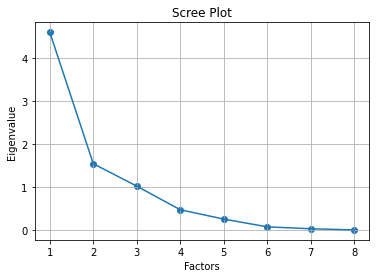

In [12]:
plt.scatter(range(1,data.shape[1]+1),ev)
plt.plot(range(1,data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa1 = FactorAnalyzer(3)
fa1.fit(data)
lmatrix1 = pd.DataFrame(fa1.loadings_, index = list(data.columns), columns = ['Factor 1', 'Factor 2','Factor 3' ])
lmatrix1

In [ ]:
fa2 = FactorAnalyzer(3, rotation='oblimin')
fa2.fit(data)
lmatrix2 = pd.DataFrame(fa2.loadings_, index = list(data.columns), columns = ['Factor 1', 'Factor 2','Factor 3'])
lmatrix2